In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType, BooleanType, DateType, StringType
from pyspark.sql import functions as F


In [ ]:



configs = {
  "fs.azure.account.auth.type": "OAuth",
  "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
  "fs.azure.account.oauth2.client.id": "insert",
  "fs.azure.account.oauth2.client.secret": "insert",
  "fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/insert/oauth2/token"
}

dbutils.fs.mount(
  source="abfss://tokyo-olympic@tokyoolympicdata1950.dfs.core.windows.net",
  mount_point="/mnt/tokyoolymic",
  extra_configs=configs
)
  


True

In [ ]:
%fs
ls "/mnt/tokyoolymic"

path,name,size,modificationTime
dbfs:/mnt/tokyoolymic/raw-data/,raw-data/,0,1714972452000
dbfs:/mnt/tokyoolymic/transformed-data/,transformed-data/,0,1714972460000


In [ ]:
athletes = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("encoding", "UTF-8").load("/mnt/tokyoolymic/raw-data/athletes.csv")
coaches = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("encoding", "UTF-8").load("/mnt/tokyoolymic/raw-data/coaches.csv")
entriesgender = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("encoding", "UTF-8").load("/mnt/tokyoolymic/raw-data/entriesgender.csv")
medals = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("encoding", "UTF-8").load("/mnt/tokyoolymic/raw-data/medals.csv")
teams = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("encoding", "UTF-8").load("/mnt/tokyoolymic/raw-data/teams.csv")

In [ ]:
athletes.show()


+--------------------+--------------------+-------------------+
|          PersonName|             Country|         Discipline|
+--------------------+--------------------+-------------------+
|     AALERUD Katrine|              Norway|       Cycling Road|
|         ABAD Nestor|               Spain|Artistic Gymnastics|
|   ABAGNALE Giovanni|               Italy|             Rowing|
|      ABALDE Alberto|               Spain|         Basketball|
|       ABALDE Tamara|               Spain|         Basketball|
|           ABALO Luc|              France|           Handball|
|        ABAROA Cesar|               Chile|             Rowing|
|       ABASS Abobakr|               Sudan|           Swimming|
|    ABBASALI Hamideh|Islamic Republic ...|             Karate|
|       ABBASOV Islam|          Azerbaijan|          Wrestling|
|        ABBINGH Lois|         Netherlands|           Handball|
|         ABBOT Emily|           Australia|Rhythmic Gymnastics|
|       ABBOTT Monica|United States of .

In [ ]:
spark

In [ ]:
athletes.printSchema()


root
 |-- PersonName: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Discipline: string (nullable = true)



In [ ]:
coaches.show()


+--------------------+--------------------+-----------------+--------+
|                Name|             Country|       Discipline|   Event|
+--------------------+--------------------+-----------------+--------+
|     ABDELMAGID Wael|               Egypt|         Football|    NULL|
|           ABE Junya|               Japan|       Volleyball|    NULL|
|       ABE Katsuhiko|               Japan|       Basketball|    NULL|
|        ADAMA Cherif|       C�te d'Ivoire|         Football|    NULL|
|          AGEBA Yuya|               Japan|       Volleyball|    NULL|
|AIKMAN Siegfried ...|               Japan|           Hockey|     Men|
|       AL SAADI Kais|             Germany|           Hockey|     Men|
|       ALAMEDA Lonni|              Canada|Baseball/Softball|Softball|
|     ALEKNO Vladimir|Islamic Republic ...|       Volleyball|     Men|
|     ALEKSEEV Alexey|                 ROC|         Handball|   Women|
|ALLER CARBALLO Ma...|               Spain|       Basketball|    NULL|
|     

In [ ]:
coaches.printSchema()


root
 |-- Name: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Discipline: string (nullable = true)
 |-- Event: string (nullable = true)



In [ ]:
entriesgender.show()


+--------------------+------+----+-----+
|          Discipline|Female|Male|Total|
+--------------------+------+----+-----+
|      3x3 Basketball|    32|  32|   64|
|             Archery|    64|  64|  128|
| Artistic Gymnastics|    98|  98|  196|
|   Artistic Swimming|   105|   0|  105|
|           Athletics|   969|1072| 2041|
|           Badminton|    86|  87|  173|
|   Baseball/Softball|    90| 144|  234|
|          Basketball|   144| 144|  288|
|    Beach Volleyball|    48|  48|   96|
|              Boxing|   102| 187|  289|
|        Canoe Slalom|    41|  41|   82|
|        Canoe Sprint|   123| 126|  249|
|Cycling BMX Frees...|    10|   9|   19|
|  Cycling BMX Racing|    24|  24|   48|
|Cycling Mountain ...|    38|  38|   76|
|        Cycling Road|    70| 131|  201|
|       Cycling Track|    90|  99|  189|
|              Diving|    72|  71|  143|
|          Equestrian|    73| 125|  198|
|             Fencing|   107| 108|  215|
+--------------------+------+----+-----+
only showing top

In [ ]:
entriesgender.printSchema()

root
 |-- Discipline: string (nullable = true)
 |-- Female: integer (nullable = true)
 |-- Male: integer (nullable = true)
 |-- Total: integer (nullable = true)



In [ ]:


entriesgender = entriesgender.withColumn("Female", col("Female").cast(IntegerType()))

In [ ]:
medals.show()


+----+--------------------+----+------+------+-----+-------------+
|Rank|        Team_Country|Gold|Silver|Bronze|Total|Rank by Total|
+----+--------------------+----+------+------+-----+-------------+
|   1|United States of ...|  39|    41|    33|  113|            1|
|   2|People's Republic...|  38|    32|    18|   88|            2|
|   3|               Japan|  27|    14|    17|   58|            5|
|   4|       Great Britain|  22|    21|    22|   65|            4|
|   5|                 ROC|  20|    28|    23|   71|            3|
|   6|           Australia|  17|     7|    22|   46|            6|
|   7|         Netherlands|  10|    12|    14|   36|            9|
|   8|              France|  10|    12|    11|   33|           10|
|   9|             Germany|  10|    11|    16|   37|            8|
|  10|               Italy|  10|    10|    20|   40|            7|
|  11|              Canada|   7|     6|    11|   24|           11|
|  12|              Brazil|   7|     6|     8|   21|          

In [ ]:
medals.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Team_Country: string (nullable = true)
 |-- Gold: integer (nullable = true)
 |-- Silver: integer (nullable = true)
 |-- Bronze: integer (nullable = true)
 |-- Total: integer (nullable = true)
 |-- Rank by Total: integer (nullable = true)



In [ ]:
teams.show()

+-------------+--------------+--------------------+------------+
|     TeamName|    Discipline|             Country|       Event|
+-------------+--------------+--------------------+------------+
|      Belgium|3x3 Basketball|             Belgium|         Men|
|        China|3x3 Basketball|People's Republic...|         Men|
|        China|3x3 Basketball|People's Republic...|       Women|
|       France|3x3 Basketball|              France|       Women|
|        Italy|3x3 Basketball|               Italy|       Women|
|        Japan|3x3 Basketball|               Japan|         Men|
|        Japan|3x3 Basketball|               Japan|       Women|
|       Latvia|3x3 Basketball|              Latvia|         Men|
|     Mongolia|3x3 Basketball|            Mongolia|       Women|
|  Netherlands|3x3 Basketball|         Netherlands|         Men|
|       Poland|3x3 Basketball|              Poland|         Men|
|          ROC|3x3 Basketball|                 ROC|         Men|
|          ROC|3x3 Basket

In [ ]:
teams.printSchema()

root
 |-- TeamName: string (nullable = true)
 |-- Discipline: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Event: string (nullable = true)



In [ ]:
# Rank countries by gold medals, high to low
# top_Medals_Countries = medals.orderBy("Gold", accending=True).select("Team_Country", "Gold").show()
top_gold_medal_countries = medals.orderBy("Gold", ascending=False).select("Team_Country","Gold").show()

+--------------------+----+
|        Team_Country|Gold|
+--------------------+----+
|United States of ...|  39|
|People's Republic...|  38|
|               Japan|  27|
|       Great Britain|  22|
|                 ROC|  20|
|           Australia|  17|
|         Netherlands|  10|
|              France|  10|
|             Germany|  10|
|               Italy|  10|
|                Cuba|   7|
|         New Zealand|   7|
|              Brazil|   7|
|              Canada|   7|
|             Hungary|   6|
|   Republic of Korea|   6|
|               Kenya|   4|
|              Poland|   4|
|      Czech Republic|   4|
|              Norway|   4|
+--------------------+----+
only showing top 20 rows



In [ ]:
# Calculate the average number of entries by gender for each discipline
average_entries_by_gender = entriesgender.withColumn(
    'Avg_Female', F.round(entriesgender['Female'] / entriesgender['Total'], 2)
).withColumn(
    'Avg_Male', F.round(entriesgender['Male'] / entriesgender['Total'], 2)
)
average_entries_by_gender.show()

+--------------------+------+----+-----+----------+--------+
|          Discipline|Female|Male|Total|Avg_Female|Avg_Male|
+--------------------+------+----+-----+----------+--------+
|      3x3 Basketball|    32|  32|   64|       0.5|     0.5|
|             Archery|    64|  64|  128|       0.5|     0.5|
| Artistic Gymnastics|    98|  98|  196|       0.5|     0.5|
|   Artistic Swimming|   105|   0|  105|       1.0|     0.0|
|           Athletics|   969|1072| 2041|      0.47|    0.53|
|           Badminton|    86|  87|  173|       0.5|     0.5|
|   Baseball/Softball|    90| 144|  234|      0.38|    0.62|
|          Basketball|   144| 144|  288|       0.5|     0.5|
|    Beach Volleyball|    48|  48|   96|       0.5|     0.5|
|              Boxing|   102| 187|  289|      0.35|    0.65|
|        Canoe Slalom|    41|  41|   82|       0.5|     0.5|
|        Canoe Sprint|   123| 126|  249|      0.49|    0.51|
|Cycling BMX Frees...|    10|   9|   19|      0.53|    0.47|
|  Cycling BMX Racing|  

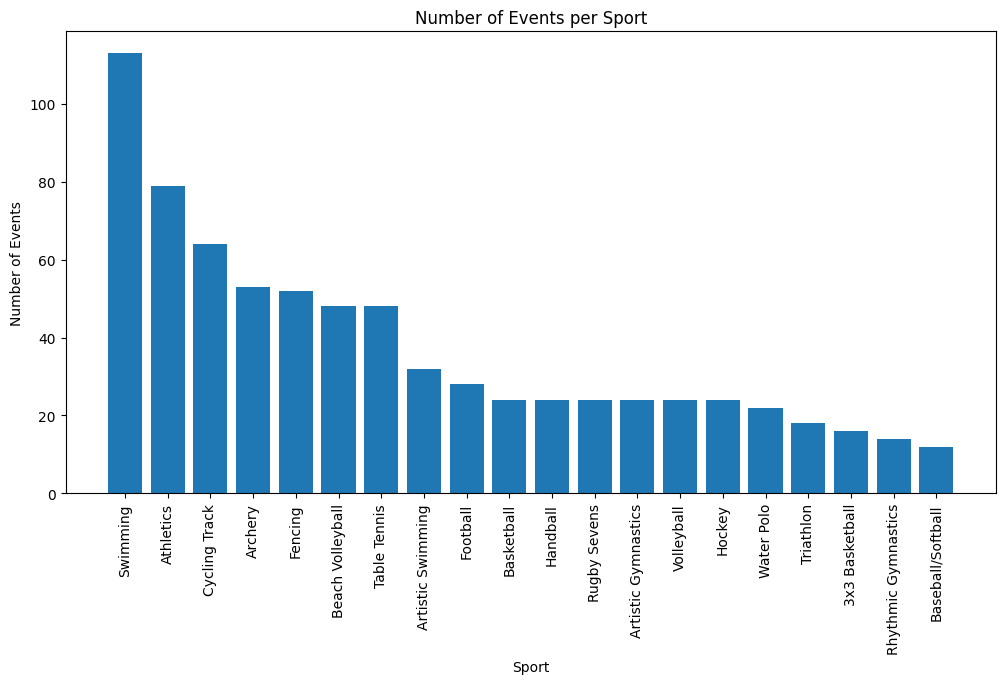

In [ ]:
import matplotlib.pyplot as plt

# Group by sport and count number of events
events_per_sport = teams.groupby("Discipline").count().orderBy("count", ascending=False)

# Convert Spark DataFrame to Pandas DataFrame for plotting
events_per_sport_pd = events_per_sport.toPandas()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(events_per_sport_pd["Discipline"], events_per_sport_pd["count"])
plt.xlabel("Sport")
plt.ylabel("Number of Events")
plt.title("Number of Events per Sport")
plt.xticks(rotation=90)
plt.show()

In [ ]:
athletes.repartition(1).write.mode("overwrite").option("header", 'true').csv("/mnt/tokyoolymic/transformed-data/athletes")

In [ ]:
coaches.repartition(1).write.mode("overwrite").option("header", 'true').csv("/mnt/tokyoolymic/transformed-data/coaches")
entriesgender.repartition(1).write.mode("overwrite").option("header", 'true').csv("/mnt/tokyoolymic/transformed-data/entriesgender")
medals.repartition(1).write.mode("overwrite").option("header", 'true').csv("/mnt/tokyoolymic/transformed-data/medals")
teams.repartition(1).write.mode("overwrite").option("header", 'true').csv("/mnt/tokyoolymic/transformed-data/teams")